# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def miseenplace (n,M,T):
    delta_w = np.random.normal(0, np.sqrt(T/n), size = (M,n))
    w = np.cumsum(delta_w,axis=1)
    #print("delta_w",delta_w)
    #print("w",w)
    w = w.T
    delta_w = delta_w.T
    delta_w.tolist()
    w.tolist()
    #print("premier",np.multiply(np.array(w[:-1]).T,np.array(delta_w[1:]).T))
    #print("deuxieme",np.multiply(np.array(w[1:]).T,np.array(delta_w[1:]).T))
    I = np.sum(np.multiply(np.array(w[:-1]).T,np.array(delta_w[1:]).T),axis = 1)
    J = np.sum(np.multiply(np.array(w[1:]).T,np.array(delta_w[1:]).T),axis = 1)
    #print("I,J",I,J)
    K = (1/2)*(I+J)
    WT = np.array(w[-1])
    #print("WT",WT)
    WTc = (1/2)*np.multiply(WT,WT)
    #print("WTc",WTc)
    var1 = WTc - I 
    var2 = WTc - J
    var3 = WTc - K
    m1 = np.mean(var1) # Les moyennes m
    m2 = np.mean(var2)
    m3 = np.mean(var3)
    et1 = np.std(var1) # Les ecarts-types et
    et2 = np.std(var2)
    et3 = np.std(var3)
    return m1,m2,m3,et1,et2,et3

In [ ]:
def compute_left(mu,sigma,M):
    #Intervalle de confiance, borne gauche
    i_left = norm.ppf(0.05)
    z_left = mu + (sigma/np.sqrt(M)) * i_left
    return z_left
def compute_right(mu,sigma,M):
    #intervalle de confiance, borne droite
    i_right = norm.ppf(0.95)
    z_right = mu + (sigma/np.sqrt(M)) * i_right
    return z_right
def rep(M,T,idd):
    #idd appartient à {1,2,3} et permet de choisir entre le calcul
    #avec I,J ou K
    left = []
    right = []
    moy = []    
    for n in range(10,21):
        res = miseenplace(n,M,T)
        mu = res[idd-1]
        moy.append(mu)
        sigma = res[idd+2]
        left.append(compute_left(mu,sigma,M))
        right.append(compute_right(mu,sigma,M))
    plt.plot(np.arange(10,21),left)
    plt.plot(np.arange(10,21),right)
    plt.plot(np.arange(10,21),moy)
    plt.title("Moyenne et bornes de l'intervalle de confiance")

## Question 1.b

In [ ]:
print(miseenplace (100,1000,2)[:3])

(1.0069937232941675, -0.9868301029586414, 0.010081810167763031)


On obtient la moyenne de $\frac{1}{2}W_{T}^{2} - I_{n}$ proche de $1$ qui est son espérance. En effet $E(W_{T}^{2}) = 2 $ car variance de $W_{T}$ et $T=2$.
\\
\\
$\frac{1}{2}W_{T}^{2} - K_{n}$ est proche de $-1$ qui est son espérance. Pour ce calcul, il suffit de devélopper la somme obtenue en faisant $I_{n} + J{n}$

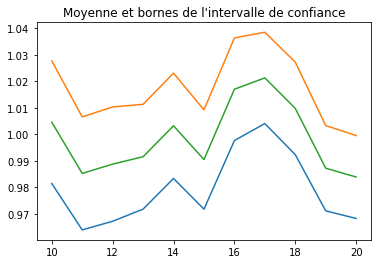

In [ ]:
#M = 1000 copies
#T = 2 
rep(1000,2,1) #idd = 1 , les calculs se font avec I

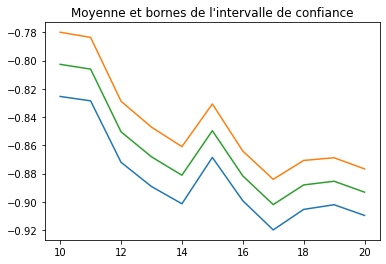

In [ ]:
rep(1000,2,2) #idd = 2 , les calculs se font avec J

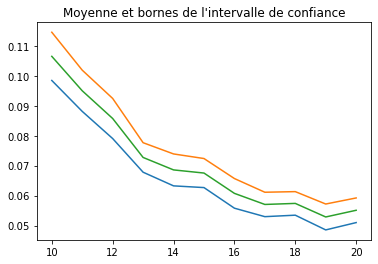

In [ ]:
rep(1000,2,3) #idd = 3 , les calculs se font avec K

# Question 2

In [ ]:
def miseenplace2 (n,M,T):
    delta_w = np.random.normal(0, np.sqrt(T/n), size = (M,n))
    w = np.cumsum(delta_w,axis=1)
    #print("delta_w",delta_w)
    #print("w",w)
    t = [i*(T/n) for i in range(n+1)]
    et = np.exp(t)
    w = np.cumsum(delta_w,axis=1)
    interm_1 = np.multiply(delta_w,et[:-1])
    interm_2 = np.multiply(delta_w,et[1:])
    interm_3 = np.sqrt(np.multiply(interm_1,interm_2))
    A = np.sum(interm_1,axis = 1)
    B = np.sum(interm_2,axis = 1)
    C = np.sum(interm_3,axis = 1)
    WT = np.array((w.T)[-1])
    WTc = (1/2)*np.multiply(WT,WT)
    var1 = WTc - A
    var2 = WTc - B
    var3 = WTc - C
    m1 = np.mean(var1)
    m2 = np.mean(var2)
    m3 = np.mean(var3)
    ect1 = np.std(var1)
    ect2 = np.std(var2)
    ect3 = np.std(var3)
    return m1,m2,m3,ect1,ect2,ect3

In [ ]:
def rep2(M,T,idd):
    left = []
    right = []
    moy = []    
    for n in range(10,51):
        res = miseenplace2(n,M,T)
        #print(res)
        mu = res[idd-1]
        moy.append(mu)
        sigma = res[idd+2]
        left.append(compute_left(mu,sigma,M))
        right.append(compute_right(mu,sigma,M))
    plt.plot(np.arange(10,51),left)
    plt.xlabel
    plt.plot(np.arange(10,51),right)
    plt.plot(np.arange(10,51),moy)
    plt.title("Moyenne et bornes de l'intervalle de confiance")

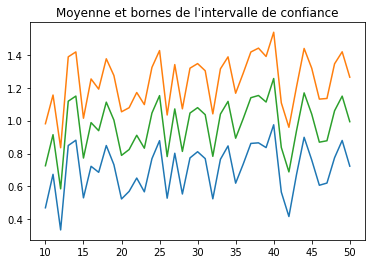

In [ ]:
rep2(1000,2,1)

# 3

In [ ]:
def miseenplace3 (n,M,T):
    delta_w = np.random.normal(0, np.sqrt(T/n), size = (M,n))
    w = np.cumsum(delta_w,axis=1)
    sin = np.sin(w)
    A = (1/(2*n))*np.sum(sin,axis = 1) + ((2*n-1)/(2*n))*((sin.T)[-1])
    m = np.mean(A)
    ec = np.std(A)
    return m,ec

In [ ]:
def rep3(M,T):
    left = []
    right = []
    moy = []    
    for n in range(10,201):
        res = miseenplace3(n,M,T)
        mu = res[0]
        moy.append(mu)
        sigma = res[1]
        left.append(compute_left(mu,sigma,M))
        right.append(compute_right(mu,sigma,M))
    plt.plot(np.arange(10,201),left)
    plt.plot(np.arange(10,201),right)
    plt.plot(np.arange(10,201),moy)
    plt.title("Moyenne et bornes de l'intervalle de confiance")

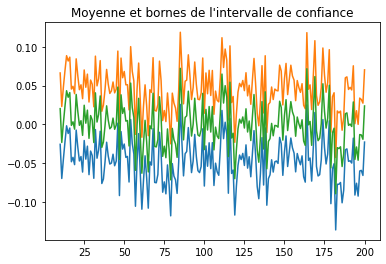

In [ ]:
rep3(1000,2)

De façon heuristique: $E(A_{n}) = 0$